In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from navtools.dsp import carrier, apply_complex_cn0, quantize
from navtools.io import SignalFile

In [2]:
FCARRIER = 1000
FSAMP = 20e6
DURATION = 0.005
DTYPE = "int8"
IQ_PATH = Path("test.iq")
CN0 = 100

In [3]:
#create carrier, corrupt carrier, quantize and cast carrier
bit_depth = int("".join([i for i in DTYPE if i.isdigit()]))

carr = carrier(fcarrier=FCARRIER, fsamp=FSAMP, duration=DURATION)
noisy_carrier = apply_complex_cn0(samples=carr, cn0=CN0, fsamp=FSAMP)
qnoisy_carrier = quantize(samples=noisy_carrier, bit_depth=bit_depth)
qcarrier = quantize(samples=carr, bit_depth=bit_depth)

file_qnoisy_carrier = qnoisy_carrier.view(float).astype(np.dtype(DTYPE))  # interleaved
print(f"# complex samples: {qnoisy_carrier.size}, # interleaved complex samples: {file_qnoisy_carrier.size}")

# complex samples: 100000, # interleaved complex samples: 200000


In [4]:
# write carrier samples to file
with open(IQ_PATH, mode="+ab") as file:
    file.write(file_qnoisy_carrier.tobytes())
    
# read samples back from file
signal = SignalFile(
    file_path=IQ_PATH, dtype=DTYPE, is_complex=True
)
samples = signal.fread(nsamples=int(DURATION*FSAMP))

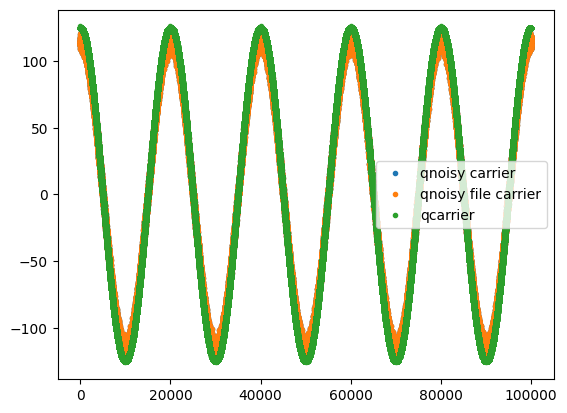

In [5]:
_, ax = plt.subplots()
ax.plot(np.real(qnoisy_carrier).astype(np.dtype(DTYPE)), ".", label="qnoisy carrier")
ax.plot(np.real(samples), ".", label="qnoisy file carrier")
ax.plot(np.real(qcarrier).astype(np.dtype(DTYPE)), ".", label="qcarrier")
plt.legend()
plt.show()

IQ_PATH.unlink() # delete file